In [1]:
import pandas as pd

In [2]:
df = pd.read_json("res.json")

In [3]:
df

,name,type,id,messages
0,Резерв вгу,private_supergroup,1799487253,"{'id': -999930594, 'type': 'service', 'date': ..."
1,Резерв вгу,private_supergroup,1799487253,"{'id': -999930593, 'type': 'service', 'date': ..."
2,Резерв вгу,private_supergroup,1799487253,"{'id': -999930592, 'type': 'message', 'date': ..."
3,Резерв вгу,private_supergroup,1799487253,"{'id': -999930591, 'type': 'message', 'date': ..."
4,Резерв вгу,private_supergroup,1799487253,"{'id': -999930583, 'type': 'message', 'date': ..."
...,...,...,...,...
18230,Резерв вгу,private_supergroup,1799487253,"{'id': 16737, 'type': 'message', 'date': '2024..."
18231,Резерв вгу,private_supergroup,1799487253,"{'id': 16738, 'type': 'message', 'date': '2024..."
18232,Резерв вгу,private_supergroup,1799487253,"{'id': 16739, 'type': 'message', 'date': '2024..."
18233,Резерв вгу,private_supergroup,1799487253,"{'id': 16740, 'type': 'message', 'date': '2024..."


In [4]:
data = {"id":[],
        "date":[],
        "from":[],
        "from_id":[],
        "text":[]
       }

In [5]:
for id, message in enumerate(df["messages"]):
    if message["type"] == "message" and message["text"] != "":
        for key in data.keys():
            data[key].append(message[key])

In [6]:
data = pd.DataFrame(data)

In [7]:
data

,id,date,from,from_id,text
0,-999930592,2023-03-18T19:03:37,Захар Андронов,user1590062710,Это пизда
1,-999930591,2023-03-18T19:03:46,Захар Андронов,user1590062710,ВК уже 3 часа лежит
2,-999930583,2023-03-18T19:04:34,ДмитрийМороз,user903166309,Прикольная аватарка
3,-999930582,2023-03-18T19:04:43,Захар Андронов,user1590062710,Ряльно
4,-999930581,2023-03-18T19:04:53,Захар Андронов,user1590062710,Там анимированные стикерв можно ставить
...,...,...,...,...,...
16572,16736,2024-04-06T02:02:28,Захар Андронов,user1590062710,Жиза для димасиком ?
16573,16737,2024-04-06T03:14:47,ДмитрийМороз,user903166309,"Нет, просто смешно"
16574,16738,2024-04-06T07:41:27,Димас,user700639199,Хахахахахахаха
16575,16739,2024-04-06T07:41:37,Димас,user700639199,😆😆😆😆😆😆😆😆😆😆😆😆👍👍👍👍👍👍👍👍👍👍👍👍👍


In [8]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pymorphy3
import plotly.graph_objs as go
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pymorphy2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vpopv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vpopv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vpopv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
work_df = data[["from","text"]]

In [10]:
import re

def remove_special_characters_and_numbers(text):
    pattern = re.compile(r'[^А-Яа-я\s]')
    return re.sub(pattern, '', text)

# Применяем функцию к столбцу 'plot' в DataFrame
work_df['norm_text'] = work_df['text'].apply(lambda x: remove_special_characters_and_numbers(str(x)))


C:\Users\vpopv\AppData\Local\Temp\ipykernel_22804\267840471.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_df['norm_text'] = work_df['text'].apply(lambda x: remove_special_characters_and_numbers(str(x)))


In [11]:
from tqdm import tqdm
lemm = nltk.WordNetLemmatizer()
text=work_df['norm_text']
norm_text=[]
for s in tqdm(text):
    s1 = re.sub(r'[^\w\s]+|[\d]+', r'',s).strip()
    s1 = s1.lower()
    s1 = word_tokenize(s1) #токенизация
    words=[]
    for i in s1:
        words.append(lemm.lemmatize(i))
    sentence=' '.join(words)
    norm_text.append(sentence)

100%|██████████████████████████████████████████████████████████████████████████| 16577/16577 [00:04<00:00, 3365.89it/s]


In [12]:
work_df['norm_text'] = norm_text

C:\Users\vpopv\AppData\Local\Temp\ipykernel_22804\977942327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_df['norm_text'] = norm_text


In [72]:
a = work_df[work_df["from"] ==  "Димас"]

In [73]:
b =work_df[work_df["from"] == "Захар Андронов"]

In [74]:
work_df = pd.concat([a,b])

In [75]:
russian_stopwords = stopwords.words("russian")
vectorizer1_g = CountVectorizer(max_features=500, min_df=20, max_df=0.7, stop_words=russian_stopwords,ngram_range=(1, 1))
text_cv1_g = vectorizer1_g.fit_transform(work_df['norm_text'])
text_cv1_g = pd.DataFrame(text_cv1_g.toarray(),columns=vectorizer1_g.get_feature_names_out())
text_cv1_g.head()

,автобус,ага,база,бля,блять,будем,буду,будут,вгу,верно,...,хули,час,часа,че,чел,чт,чтото,щя,эта,это
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
russian_stopwords = stopwords.words("russian")
vectorizer2_g = CountVectorizer(max_features=500, min_df=10, max_df=0.7, stop_words=russian_stopwords,ngram_range=(2, 2))
text_cv2_g = vectorizer2_g.fit_transform(work_df['norm_text'])
text_cv2_g = pd.DataFrame(text_cv2_g.toarray(),columns=vectorizer2_g.get_feature_names_out())
text_cv2_g.head()

,андронов дмитрий,ебать рофл,захар андронов,ладно похуй,летал компани,нахуй нахуй,норм тема,поздняков подписаться,самом деле,хуй знает,это верно,это вообще,это имба,это пиздец,это рак
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
russian_stopwords = stopwords.words("russian")
vectorizer3_g = CountVectorizer(max_features=500, min_df=10, max_df=0.7, stop_words=russian_stopwords,ngram_range=(3, 3))
text_cv3_g = vectorizer3_g.fit_transform(work_df['norm_text'])
text_cv3_g = pd.DataFrame(text_cv3_g.toarray(),columns=vectorizer3_g.get_feature_names_out())
text_cv3_g.head()

,захар андронов дмитрий
0,0
1,0
2,0
3,0
4,0


In [81]:
df_full_cv = pd.concat([text_cv1_g,text_cv2_g,text_cv3_g],axis=1)
df_full_cv.shape

(11811, 182)

In [82]:
df_full_cv

,автобус,ага,база,бля,блять,будем,буду,будут,вгу,верно,...,норм тема,поздняков подписаться,самом деле,хуй знает,это верно,это вообще,это имба,это пиздец,это рак,захар андронов дмитрий
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11808,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11809,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
vectorizer_tfidf_1g = TfidfVectorizer(max_features=500, min_df=20, max_df=0.7, stop_words=russian_stopwords, ngram_range=(1, 1))
text_tfidf_1g = vectorizer_tfidf_1g.fit_transform(work_df['norm_text'])
text_tfidf_1g = pd.DataFrame(text_tfidf_1g.toarray(),columns=vectorizer_tfidf_1g.get_feature_names_out())
text_tfidf_1g.head()

,автобус,ага,база,бля,блять,будем,буду,будут,вгу,верно,...,хули,час,часа,че,чел,чт,чтото,щя,эта,это
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.503939
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [84]:
vectorizer_tfidf_2g = TfidfVectorizer(max_features=500, min_df=10, max_df=0.7, stop_words=russian_stopwords, ngram_range=(2, 2))
text_tfidf_2g = vectorizer_tfidf_2g.fit_transform(work_df['norm_text'])
text_tfidf_2g = pd.DataFrame(text_tfidf_2g.toarray(),columns=vectorizer_tfidf_2g.get_feature_names_out())
text_tfidf_2g.head()

,андронов дмитрий,ебать рофл,захар андронов,ладно похуй,летал компани,нахуй нахуй,норм тема,поздняков подписаться,самом деле,хуй знает,это верно,это вообще,это имба,это пиздец,это рак
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
vectorizer_tfidf_3g = TfidfVectorizer(max_features=500, min_df=10, max_df=0.7, stop_words=russian_stopwords, ngram_range=(3, 3))
text_tfidf_3g = vectorizer_tfidf_3g.fit_transform(work_df['norm_text'])
text_tfidf_3g = pd.DataFrame(text_tfidf_3g.toarray(),columns=vectorizer_tfidf_3g.get_feature_names_out())
text_tfidf_3g.head()

,захар андронов дмитрий
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [87]:
df_full_tf = pd.concat([text_tfidf_1g,text_tfidf_2g,text_tfidf_3g],axis=1)
df_full_tf.shape

(11811, 182)

In [88]:
df_full_tf

,автобус,ага,база,бля,блять,будем,буду,будут,вгу,верно,...,норм тема,поздняков подписаться,самом деле,хуй знает,это верно,это вообще,это имба,это пиздец,это рак,захар андронов дмитрий
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [90]:
scal_X_cv = StandardScaler().fit_transform(df_full_cv)
scal_X_cv = pd.DataFrame(scal_X_cv, columns=df_full_cv.columns)

In [91]:
encoder = LabelEncoder()
y_label = encoder.fit_transform(work_df['from'])
y = to_categorical(y_label)

In [92]:
X_train_full,X_test,y_train_full,y_test = train_test_split(scal_X_cv,y,test_size=0.2,random_state=0)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=0)

In [94]:
model = keras.models.Sequential()
model.add(Dense(1000, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"])

history=model.fit(X_train, y_train, epochs =10,batch_size=128,validation_data=(X_valid,y_valid))

acc=model.evaluate(X_test,y_test)

Epoch 1/10


C:\Users\vpopv\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5438 - loss: 0.6980 - val_accuracy: 0.5635 - val_loss: 0.6674
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5719 - loss: 0.6509 - val_accuracy: 0.5772 - val_loss: 0.6532
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5874 - loss: 0.6400 - val_accuracy: 0.5735 - val_loss: 0.6620
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6077 - loss: 0.6328 - val_accuracy: 0.5857 - val_loss: 0.6521
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6112 - loss: 0.6274 - val_accuracy: 0.5836 - val_loss: 0.6547
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6049 - loss: 0.6157 - val_accuracy: 0.5799 - val_loss: 0.6530
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6034 - loss: 0.6136 - val_accuracy: 0.5788 - val_loss: 0.6739
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6148 - loss: 0.6135 - val_accuracy: 0.5868 - val_loss: 0.

In [95]:
X_train_full,X_test,y_train_full,y_test = train_test_split(df_full_tf,y,test_size=0.2,random_state=0)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=0)

In [96]:
model_tf = keras.models.Sequential()
model_tf.add(Dense(1000, activation='relu', input_dim=X_train.shape[1]))
model_tf.add(Dense(500, activation='relu'))
model_tf.add(Dense(250, activation='relu'))
model_tf.add(Dense(y.shape[1], activation='softmax'))

model_tf.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"])

history=model_tf.fit(X_train, y_train, epochs =10,batch_size=128,validation_data=(X_valid,y_valid))

acc=model_tf.evaluate(X_test,y_test)

Epoch 1/10


C:\Users\vpopv\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5590 - loss: 0.6792 - val_accuracy: 0.5434 - val_loss: 0.6562
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5844 - loss: 0.6472 - val_accuracy: 0.5831 - val_loss: 0.6497
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6041 - loss: 0.6352 - val_accuracy: 0.5783 - val_loss: 0.6508
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5957 - loss: 0.6310 - val_accuracy: 0.5810 - val_loss: 0.6523
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6132 - loss: 0.6215 - val_accuracy: 0.5788 - val_loss: 0.6599
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6088 - loss: 0.6240 - val_accuracy: 0.5767 - val_loss: 0.6557
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6079 - loss: 0.6143 - val_accuracy: 0.5868 - val_loss: 0.6551
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6177 - loss: 0.6088 - val_accuracy: 0.5847 - val_loss: 0.

In [97]:
X_train_full,X_test,y_train_full_label,y_test_label = train_test_split(df_full_tf,y_label,test_size=0.2,random_state=0)

In [98]:
y_test_label.shape

(2363,)

In [99]:
genre_classes = encoder.classes_
for i, genre in enumerate(genre_classes):
    print(f"Genre: {genre}, Label: {i}")

Genre: Димас, Label: 0
Genre: Захар Андронов, Label: 1


In [100]:
y_pred = model_tf.predict(X_test)
y_pred = y_pred.argmax(axis=-1)
y_pred

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

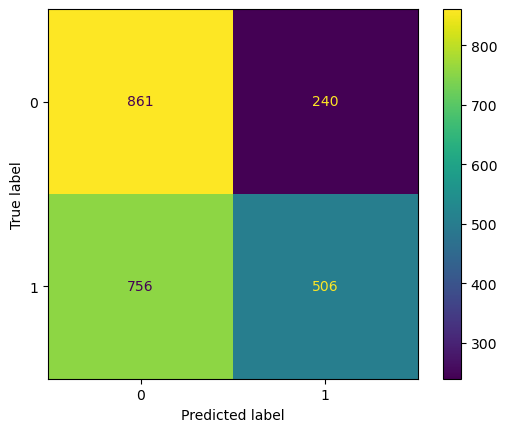

In [101]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_label, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test_label,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.78      0.63      1101
           1       0.68      0.40      0.50      1262

    accuracy                           0.58      2363
   macro avg       0.61      0.59      0.57      2363
weighted avg       0.61      0.58      0.56      2363



In [103]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [104]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(work_df['norm_text'])

X = tokenizer.texts_to_sequences(work_df['norm_text'])

vocab_size = len(tokenizer.word_index) + 1

In [105]:
vocab_size

9848

In [106]:
from keras.utils import pad_sequences
maxlen = 100

X = pad_sequences(X, padding='post', maxlen=maxlen)

print(X[0, :])

[2200    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [107]:
from keras import layers
from keras.models import Sequential

embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim))  # Pass the Embedding layer directly
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(y.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [108]:
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=0)

In [109]:
history=model.fit(X_train, y_train, epochs =5,batch_size=128,validation_data=(X_valid,y_valid))

acc=model.evaluate(X_test,y_test)
print(np.array(acc)[1].round(2))

Epoch 1/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5263 - loss: 0.7022 - val_accuracy: 0.5169 - val_loss: 0.7076
Epoch 2/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5692 - loss: 0.6842 - val_accuracy: 0.5376 - val_loss: 0.6728
Epoch 3/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6895 - loss: 0.6072 - val_accuracy: 0.6460 - val_loss: 0.6205
Epoch 4/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8228 - loss: 0.4274 - val_accuracy: 0.6540 - val_loss: 0.6369
Epoch 5/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8831 - loss: 0.2798 - val_accuracy: 0.6476 - val_loss: 0.6893
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6612 - loss: 0.6998
0.65


In [110]:
def predict_class(tokenizer, model,encoder, maxlen,text):
  vector = tokenizer.texts_to_sequences([text])
  vector_x = pad_sequences(vector, padding='post', maxlen=maxlen)
  y_preds = model.predict(vector_x)
  y_class = y_preds.argmax(axis=-1)
  return encoder.inverse_transform(y_class)[0]


In [113]:
#пример с  tokenizer keras
text = "я тупой даун" #текст уже нормализован (ну, типа)
predict_class(tokenizer, model,encoder, maxlen,text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


'Захар Андронов'

In [123]:
from keras import layers
from tensorflow.keras.layers import LSTM

embedding_dim = 100

modelLSTM = Sequential()
modelLSTM.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_shape=(maxlen,)))

modelLSTM.add(layers.LSTM(64))
modelLSTM.add(layers.Dense(y.shape[1], activation='softmax'))

modelLSTM.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"])
modelLSTM.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 100, 100)            │         984,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 64)                  │          42,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,027,170 (3.92 MB)

 Trainable params: 1,027,170 (3.92 MB)

 Non-trainable params: 0 (0.00 B)

In [124]:
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=0)

In [125]:
history=modelLSTM.fit(X_train, y_train, epochs =10,batch_size=128,validation_data=(X_valid,y_valid))

acc=modelLSTM.evaluate(X_test,y_test)
print(np.array(acc)[1].round(2))

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.5234 - loss: 0.6925 - val_accuracy: 0.5169 - val_loss: 0.6944
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.5322 - loss: 0.6921 - val_accuracy: 0.5169 - val_loss: 0.6930
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.5457 - loss: 0.6897 - val_accuracy: 0.5169 - val_loss: 0.6928
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.5368 - loss: 0.6904 - val_accuracy: 0.5169 - val_loss: 0.6927
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.5331 - loss: 0.6911 - val_accuracy: 0.5169 - val_loss: 0.6935
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.5325 - loss: 0.6913 - val_accuracy: 0.5169 - val_loss: 0.6931
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.5293 - loss: 0.6923 - val_accuracy: 0.5169 - val_loss: 0.6930
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.5290 - loss: 0.6918 - val_accuracy: 0.5169 - v